In [13]:
import numpy
import matplotlib
from PIL import Image
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt 

In [14]:
##################################### RGB TO BINARY CONVERSION ################################################

In [15]:
def rgb_to_binary(url):
    im = Image.open(url).convert("L")
    test = im.point(lambda x: 0 if x<100 else 1)
    test.save("binary.png")
    image = misc.imread("binary.png")
    print("shape = ", image.shape)
    plt.imshow(image, cmap = matplotlib.cm.Greys_r) 
    plt.show()
    return image

In [16]:
##################################### FIRST PASS ################################################

In [17]:
def first_pass(v,image):
    compare = []
    lab = 50
    container = np.full(image.shape, 0, dtype=int)
    for r in range(len(image)): 
        for c in range(len(image[r])): 
            
            if image[r][c] == v:
                
                if r == 0 and c == 0:
                    container[r][c] = lab
                    lab += 1

                elif r == 0:
                    if image[r][c-1] == 0:
                        container[r][c] = lab
                        lab += 1
                    else:
                        container[r][c] = container[r][c-1]

                elif c == 0:
                    if image[r-1][c] == 0:
                        container[r][c] = lab
                        lab += 1
                    else:
                        container[r][c] = image[r-1][c]

                else:

                    if container[r-1][c] == 0 and container[r][c-1] == 0:
                        container[r][c] = lab
                        lab += 1

                    elif container[r-1][c] == container[r][c-1]:
                        container[r][c] = container[r-1][c]

                    elif container[r-1][c] >= container[r][c-1] and container[r][c-1] != 0:
                        container[r][c] = container[r][c-1]
                        compare.append((container[r][c-1],container[r-1][c]))

                    elif container[r-1][c] <= container[r][c-1] and container[r-1][c] != 0:
                        container[r][c] = container[r-1][c]
                        
                        compare.append((container[r-1][c],container[r][c-1]))
                        
                    elif container[r-1][c] >= container[r][c-1] and container[r][c-1] == 0:
                        container[r][c] = container[r-1][c]
                    
                    elif container[r-1][c] <= container[r][c-1] and container[r-1][c] == 0:
                        container[r][c] = container[r][c-1]
    print("First Pass: ")
    plt.imshow(container, cmap = matplotlib.cm.nipy_spectral) 
    plt.show()
    compare = list(set(compare))
    return (container,compare)


In [18]:
##################################### SECOND PASS ################################################

In [19]:
def second_pass(compare,container):
    print("Second Pass: ")
    for x in compare:    
        for r in range(len(container)): 
                for c in range(len(container[r])):
                    if container[r][c] == x[1]:
                        container[r][c] = x[0]
    plt.imshow(container, cmap = matplotlib.cm.nipy_spectral) 
    plt.show()

In [20]:
############################################# Funtion Testing ################################################

In [21]:
def model(image_url, mode):
    image = rgb_to_binary(image_url)
    output = first_pass(mode,image);
    container = output[0]
    compare = output[1]
    second_pass(compare,container)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


shape =  (331, 508)


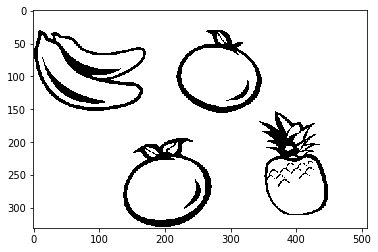

First Pass: 


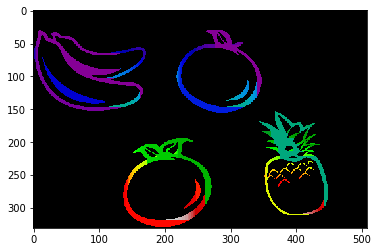

Second Pass: 


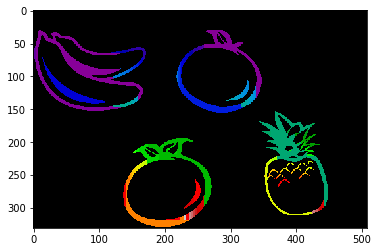

In [22]:
model("test.png",0)